## Q1


Consider the linear regression model with likelihood
$$
p(\mathbf{y}|\boldsymbol{\beta},\sigma^2,\mathbf{X}) \propto \exp\!\left(-\frac{1}{2\sigma^2} (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})\right),
$$
and the prior
$$
\boldsymbol{\beta} \sim \mathcal{N}(\boldsymbol{\beta}_0, \boldsymbol{\Sigma}_\beta)
\quad \Longrightarrow \quad
p(\boldsymbol{\beta}) \propto \exp\!\left(-\frac{1}{2} (\boldsymbol{\beta}-\boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_\beta^{-1} (\boldsymbol{\beta}-\boldsymbol{\beta}_0)\right).
$$

Multiplying likelihood and prior gives the posterior (up to proportionality)
$$
p(\boldsymbol{\beta}|\mathbf{y},\mathbf{X},\sigma^2) \propto \exp\!\Biggl[-\frac{1}{2\sigma^2}(\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y}-\mathbf{X}\boldsymbol{\beta}) - \frac{1}{2} (\boldsymbol{\beta}-\boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_\beta^{-1} (\boldsymbol{\beta}-\boldsymbol{\beta}_0)\Biggr].
$$

Expanding the quadratic form from the likelihood,
$$
(\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})
= \mathbf{y}^\top\mathbf{y} - 2\mathbf{y}^\top\mathbf{X}\boldsymbol{\beta} + \boldsymbol{\beta}^\top \mathbf{X}^\top \mathbf{X}\boldsymbol{\beta},
$$
and grouping the $\boldsymbol{\beta}$-dependent terms (ignoring constants), we have
$$
-\frac{1}{2}\left[\boldsymbol{\beta}^\top\!\left(\frac{1}{\sigma^2}\mathbf{X}^\top\mathbf{X} + \boldsymbol{\Sigma}_\beta^{-1}\right)\!\boldsymbol{\beta} - 2\boldsymbol{\beta}^\top\!\left(\frac{1}{\sigma^2}\mathbf{X}^\top\mathbf{y} + \boldsymbol{\Sigma}_\beta^{-1}\boldsymbol{\beta}_0\right)\right].
$$

Completing the square, we identify the posterior as a multivariate normal with
$$
\boldsymbol{\Sigma}_{\beta|y}^{-1} = \frac{1}{\sigma^2}\mathbf{X}^\top\mathbf{X} + \boldsymbol{\Sigma}_\beta^{-1},
$$
and mean
$$
\boldsymbol{\mu}_\beta = \boldsymbol{\Sigma}_{\beta|y}\left(\frac{1}{\sigma^2}\mathbf{X}^\top\mathbf{y} + \boldsymbol{\Sigma}_\beta^{-1}\boldsymbol{\beta}_0\right).
$$

Thus, the posterior for $\boldsymbol{\beta}$ is
$$
\boxed{
\boldsymbol{\beta}|\mathbf{y},\mathbf{X},\sigma^2 \sim \mathcal{N}\Bigl(\boldsymbol{\mu}_\beta,\boldsymbol{\Sigma}_{\beta|y}\Bigr)
}
$$
with
$$
\boldsymbol{\Sigma}_{\beta|y} = \left(\frac{1}{\sigma^2}\mathbf{X}^\top\mathbf{X} + \boldsymbol{\Sigma}_\beta^{-1}\right)^{-1}.
$$

## Posterior for $\sigma^2$

For the error variance, assume that, given $\boldsymbol{\beta}$, the likelihood is
$$
p(\mathbf{y}|\boldsymbol{\beta},\sigma^2,\mathbf{X}) \propto (\sigma^2)^{-n/2} \exp\!\left(-\frac{1}{2\sigma^2} (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})\right),
$$
and that the prior is
$$
\sigma^2 \sim \text{Inv-Gamma}(\alpha^*,\beta^*)
\quad \Longrightarrow \quad
p(\sigma^2) \propto (\sigma^2)^{-\alpha^*-1}\exp\!\left(-\frac{\beta^*}{\sigma^2}\right).
$$

Multiplying these we obtain
$$
p(\sigma^2|\mathbf{y},\mathbf{X},\boldsymbol{\beta}) \propto (\sigma^2)^{-n/2-\alpha^*-1}\exp\!\left(-\frac{1}{\sigma^2}\Bigl[\frac{1}{2}S + \beta^*\Bigr]\right),
$$
where
$$
S = (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y}-\mathbf{X}\boldsymbol{\beta}).
$$

Recognizing the kernel of an inverse-gamma distribution, we conclude that
$$
\boxed{
\sigma^2|\mathbf{y},\mathbf{X},\boldsymbol{\beta} \sim \text{Inv-Gamma}\!\left(\alpha^*+\frac{n}{2},\, \beta^*+\frac{1}{2}S\right).
}
$$


## Q2
https://www.kaggle.com/datasets/rajmohnani12/huntington-disease-dataset?resource=download

In [1]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./Huntington_Disease_Dataset.csv')
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['Patient_ID', 'Age', 'Sex', 'Family_History', 'HTT_CAG_Repeat_Length', 'Motor_Symptoms', 'Cognitive_Decline', 'Chorea_Score', 'Brain_Volume_Loss', 'Functional_Capacity', 'Gene_Mutation_Type', 'HTT_Gene_Expression_Level', 'Protein_Aggregation_Level', 'Random_Protein_Sequence', 'Random_Gene_Sequence', 'Disease_Stage', 'Gene/Factor', 'Chromosome_Location', 'Function', 'Effect', 'Category']


In [2]:
predictor_col = 'HTT_CAG_Repeat_Length'
target_col = 'Functional_Capacity'
X = df[[predictor_col]].copy()
X.insert(0, 'Intercept', 1)
y = df[target_col].values
X = X.values
n, p = X.shape
print(n,p)

48536 2


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 14 seconds.


           mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]  37.77  0.50   36.82    38.71       0.01     0.01   2294.38   
betas[1]   0.21  0.01    0.19     0.22       0.00     0.00   2289.28   
sigma     29.34  0.10   29.17    29.52       0.00     0.00   3647.11   

          ess_tail  r_hat  
betas[0]   3209.41    1.0  
betas[1]   3071.34    1.0  
sigma      3553.49    1.0  


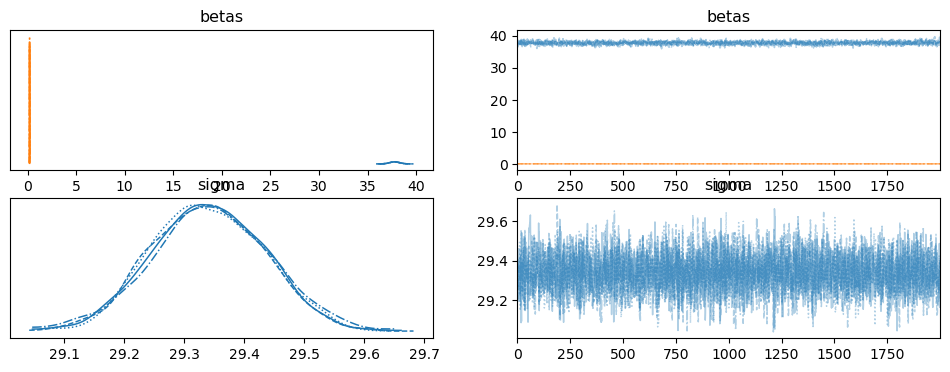

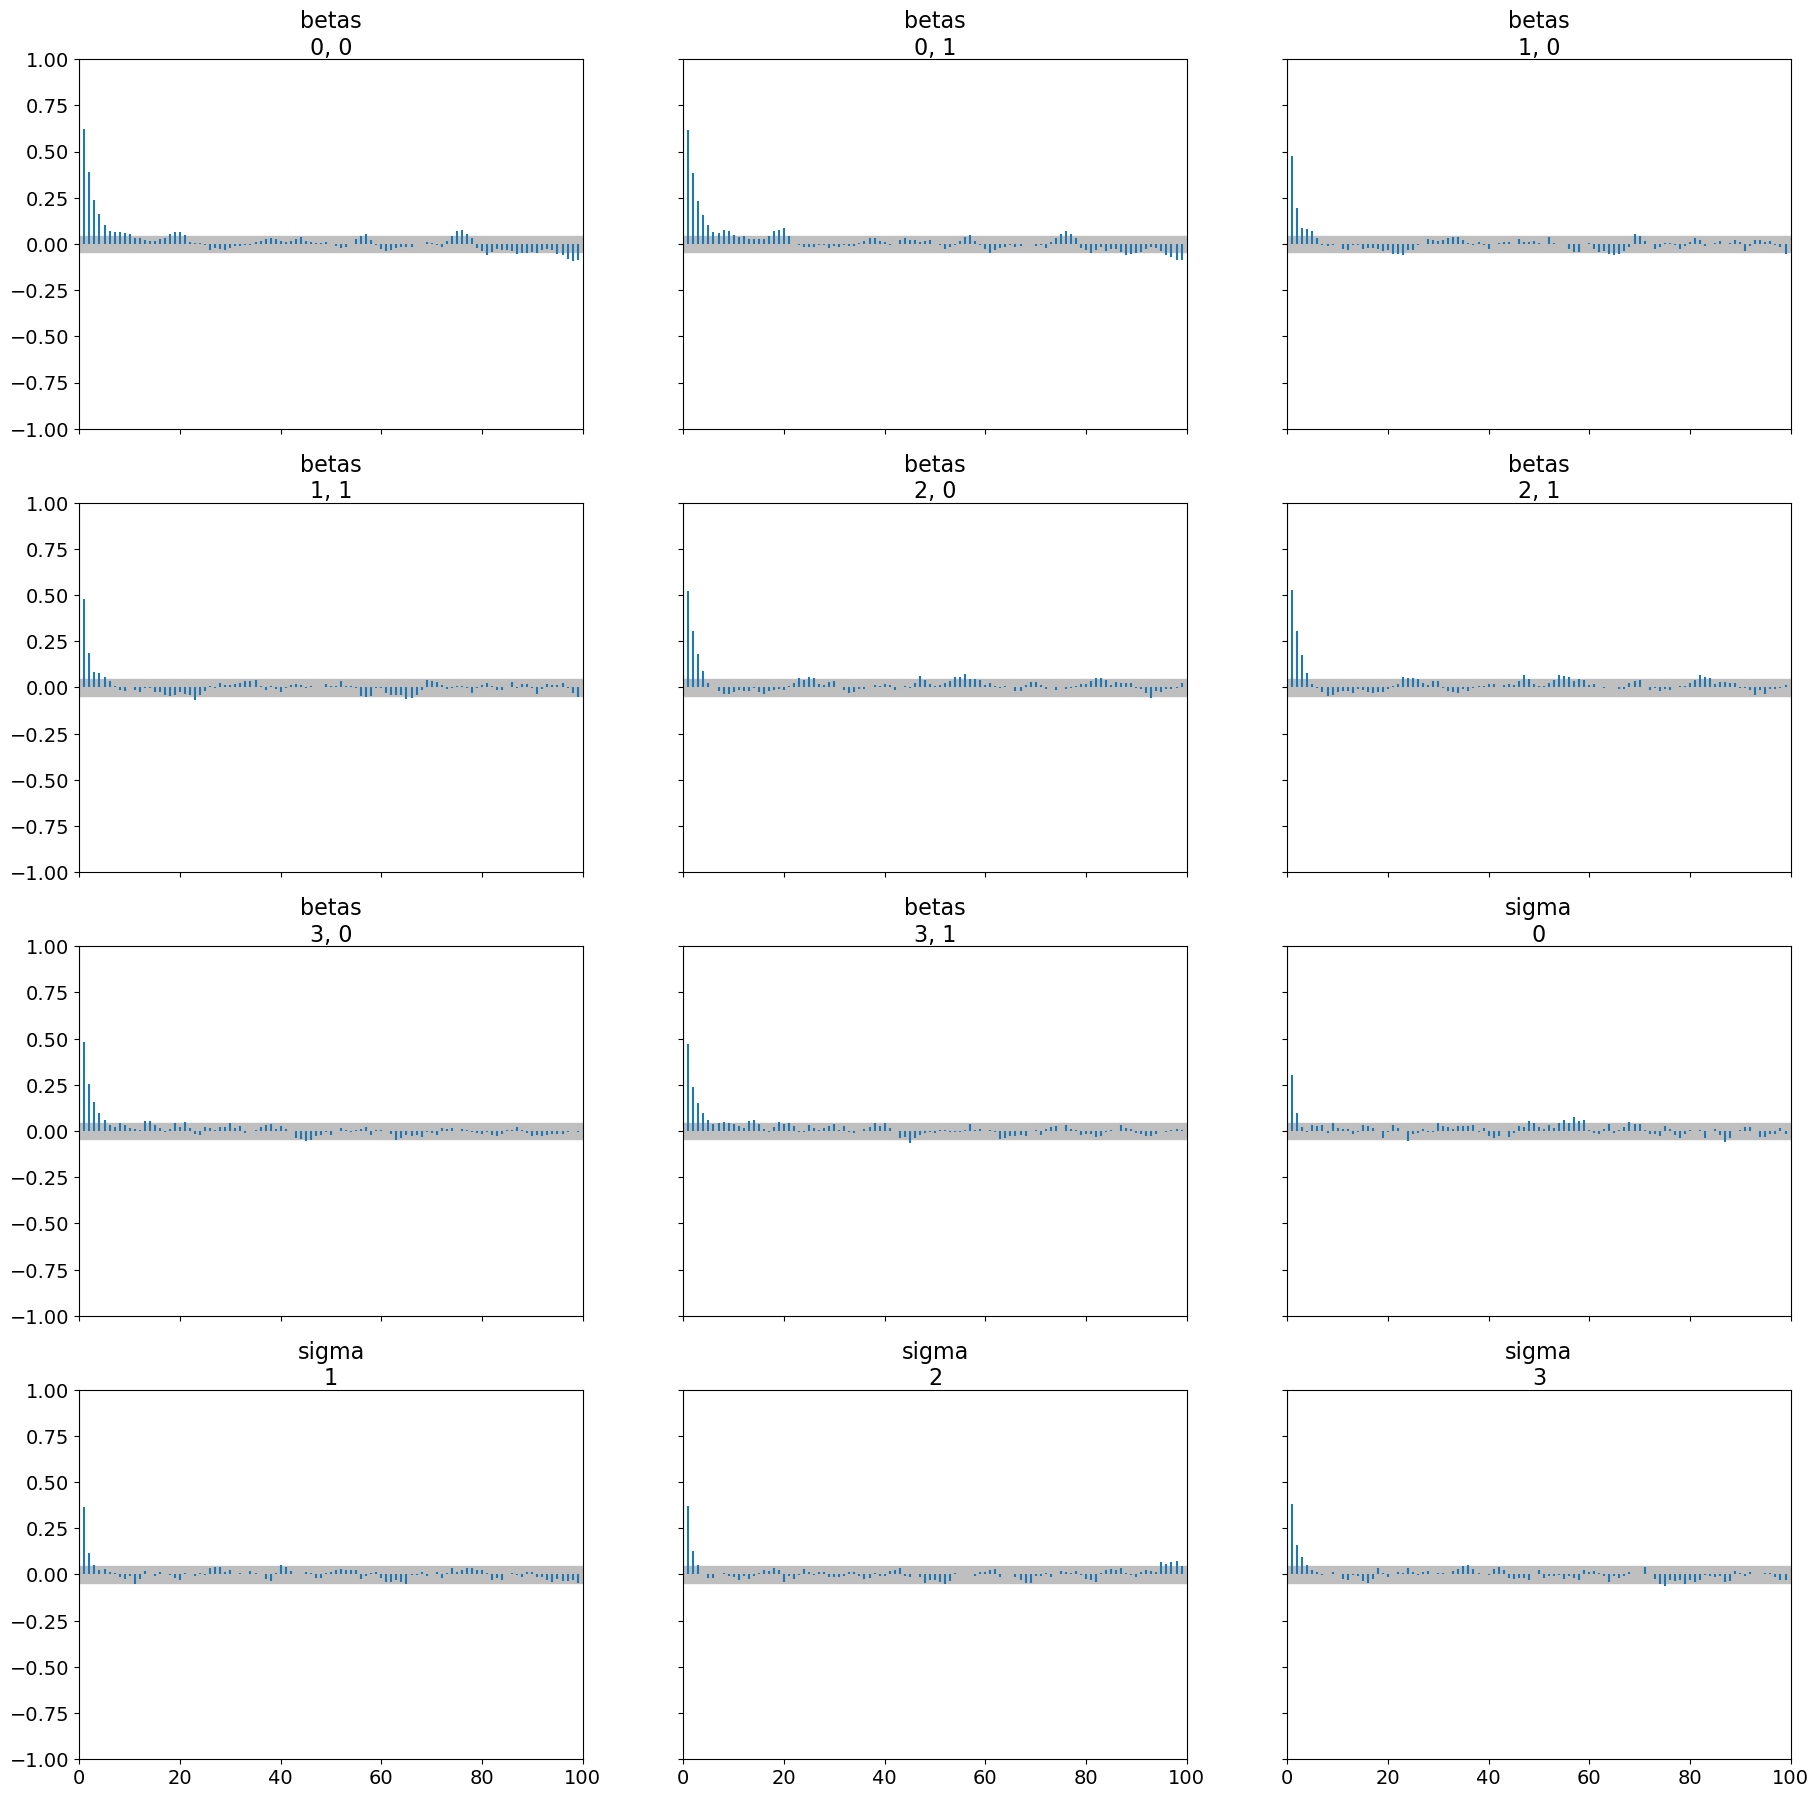

In [3]:
with pm.Model() as model:
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    sigma = pm.HalfCauchy('sigma', beta=1)
    mu = pm.math.dot(X,betas)
    y_obs = pm.Normal('y', mu=mu, sigma=sigma, observed=y)
    trace = pm.sample(2000, tune=1000, target_accept=0.95, return_inferencedata=True)
print(az.summary(trace, round_to=2))
az.plot_trace(trace)
plt.show()
az.plot_autocorr(trace)
plt.show()